# BurstPy: a Quick Walkthrough
This is a quick walkthrough of the autocorrelation statistical analysis package I put together working for the Lagha Lab at IGMM in Montpellier, France. 
### What does it do?
The purpose of this software package is to quantify *"bursty"* transcription dynamics in fly embryos. Due to noise and stochastic (random) variability in GFP MS2 signal cell-to-cell, an autocorrelation approach is necessary to decipher the patterns by which gene promoters start and stop transcription. We rely primarily on the derivation in Desponds et al (2016) for extracting two-state promoter dynamics from data.

### What do I need to run it?
The package runs on Python 3, and will (eventually) be implemented into its own, standalone GUI interface for easy access within the lab environment. 

## Why Autocorrelation?
Recent advancements in gene splicing have made it possible to track transcriptional processes (in *drosophila* embryos) in real time. The MS2 GFP cassette, a string of fluorescing molecules, can be attached to an RNA Polymerase (polII) as it transcribes a section of a gene.  The result is a flourescent signal that can be tracked and measured over time to illuminate how these polymerases behave during transcription. 

Although the MS2 system is in itself a breakthrough, the resulting signals or "traces" from each transcribing cell are inherently random signals--that is, they stem from a fundamentally *stochastic* process. What's more, measurement noise and cell-to-cell variability can obscure dynamics even more, making it impossible to resolve single traces by eye.

Signal autocorrelation is an approach that bypasses many of these issues. Autocorrelation compares a random signal, $X(t)$ with itself at every time point, "sliding" the function along itself. Let's assume for now that $X(t)$ can either be "ON" or "OFF", each state for a random duration of time. The autocorrelation function tells us to what degree a signal "remembers" itself being either "ON" or "OFF". That is, how similar is the signal at time $t$, $X(t) = X_t$, to itself at time $s$, when the signal $X(t)$ = $X_s$?

The equation that describes this process is:
  
  

where $\mu$ is the mean of the signal, and $\sigma^2$ is the variance.
A good illustration (courtesy of Wikipedia):

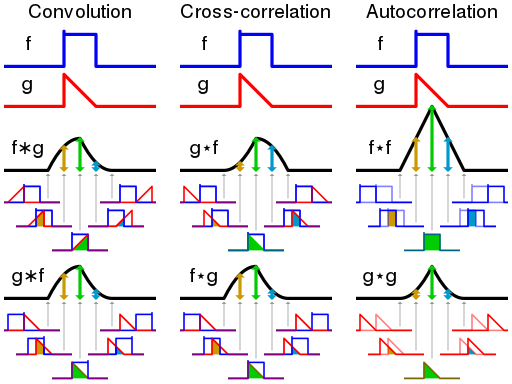


Following some mathematical derivation (which I might include later for a Poisson process), we find that the autocorrelation function takes the form of an exponential decay curve, dependent solely on the time *delay* between comparison points in the signal $X(t)$.

The characteristic decay time, $\tau_{char}$, can be linked to the *underlying random distribution* that tells $X(t)$ how long to stay "ON" or "OFF". In the case of Poisson-distributed wait durations, $\tau_{char}$ is the mean of the distribution. 

## Case Study: One-State Poisson Random Promoter

When building our models of transcription, we assume that the trigger of polymerase activity is a promoter state. This promoter state acts like a switch: either the gene is "ON" or "OFF"--e.g. our $X(t)$ above. Let's assume that the promoter switches "ON" or "OFF" randomly, drawing each time between switches from a *Poisson distribution*. Poisson distributions are used to describe single, "rare", uncorrelated events--in this case, flipping the switch. The poisson probability of switching off ...

## Two-State Promoter: A more realistic system
In the biological context of our transcription system, our gene promoter is what takes the form of the "ON/OFF" signal $X(t)$. This promoter (we assume) turns "ON" and calls in polII molecules to start converting DNA to mRNA. However, we know qualitatively that "OFF" times are generally different (longer) than "ON" times in transcription. We therefore *make the assumption* that our "ON" and "OFF" state durations are related each to an exponential distribution centered on $k_{on}$ and $k_{off}$, respectively.

When a promoter is "ON", a polII will hop onto the gene and begin transcribing with a given speed, $k_{elong}$, collecting GFP loops and producing a growing signal. As a result, the "telegraph" ON/OFF signal becomes *convolved* with the linearly-growing GFP signal, as in the example below:

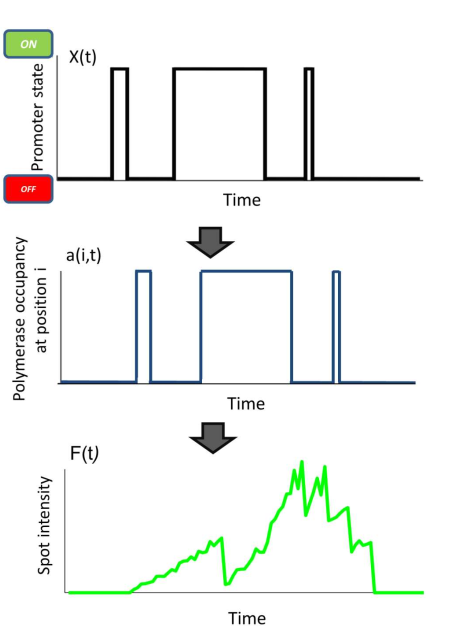

This fluorescent signal is inherently noisy, so performing an autocorrelation analysis on a single cell's trace will result in something like this:

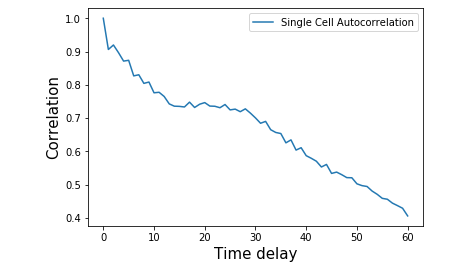

So, to get around this, we take a look at an **average** autocorrelation of **~40-100** cell traces in a local (boxed) region, as Desponds et al (2016) did below:

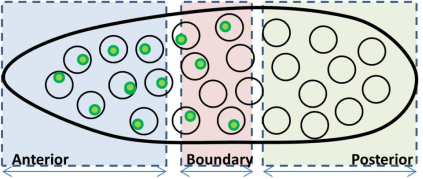

To compute this autocorrelation, we normalize each trace $I(t)$ by the mean of the maximum intensities of all cells in the region, $I_o$. We then subtract out the mean value of each trace. The result is:

$$ <F(t)> = \frac{I(t) - \mu_{I(t)}}{I_o} $$

Then, autocorrelating each corrected trace, $<F(t)>$ and taking the average of all autocorrelations, we obtain something like this:

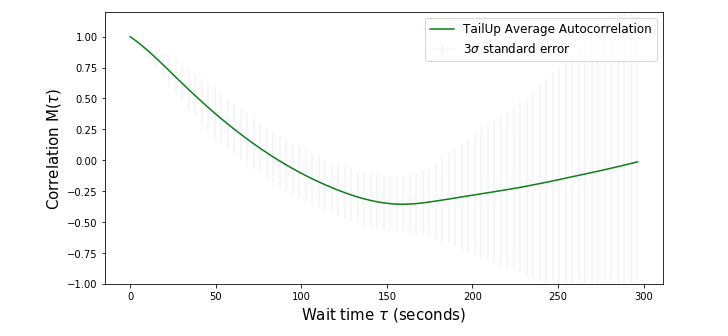

This smooths out the shape such that we get a fittable curve. 

## Adapting Desponds et al's Two-State System
In their 2016 paper, Desponds et al derived a link between these two distributions and the resulting autocorrelation function of random MS2 signals. The crux of this paper is knowing a single polII's MS2 construct, by basepair, $L(i)$. The normalized fluorescent signal, $<F(t)>$, is related to this fluorescent construct by the relation:

$$<F(t)> = P_{on}\sum_{n=1}^{r} L_i $$

Where $P_{on}$ is the average time the set of traces spend in the "ON" position, and $r$ is the maximum number of loops allowed by the MS2 construct. The sum over $L(i)$ at each gene position $i$ represents a single polII's total contribution to the average florescence.

$P_{on}$, once fitted for from the calibrated average fluorescence, $<F(t)>$, can be used to *decouple* $k_{on}$ and $k_{off}$ through the relation:

$$P_{on} = \frac{k_{on}}{k_{on} + k{off}} $$


Much of the publication was the derivation of a fine-tuned, finite-length *analytic* autocorrelation function for short cell signals, dependent on the MS2 loop construct. Fitting via least-squares optimization (for example) for this two-state autocorrelation infers the characteristic time, $\tau_{char}$ from the average autocorrelation of cell traces. The analytic two-state model is: 

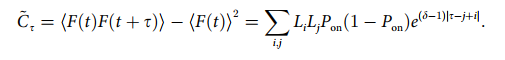

where $\tau$ is the time delay between points in the signal and $L_i$ are the MS2 loop functions, indexed by position $i$ on the gene. The function is fitted for $\delta = 1 - (k_{on} + k_{off})$, which gives the characteristic time $\tau_{char}$ of the decay curve.

Desponds et al then introduced a finite correction to this function, which "smooths out" to the infinite solution (above) as cell signals increase:

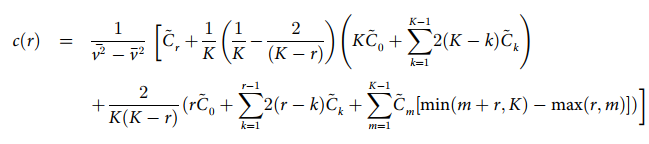

Don't worry about the mathematical semantics here. The point is that **this function is fine-tuned to handle short cell signals**.


### Le But (the gist)

Knowing that $(k_{on} + k_{off})^{-1} = \tau_{char}$, we can now infer all parameters of our biological system by fitting 

**1) Pon from calibrated trace data** 

and

**2) $\tau_{char}$ from Desponds' analytic autocorrelation function**





## BurstPy example
Ok, now that we've looked through the basis of our two-state system, let's take a look at an example using the BurstPy package.

For this example, we're going to be working from a folder called "BurstPy". Eventually, I hope to get the package incorporated as a Python library, but let's not get ahead of ourselves.

Once we're navigated to our BurstPy folder, let's pull in all of the packages that we're going to need for our analysis:

In [1]:
# These are all of the published Python packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit

In [2]:
# And these are all of the BurstPy functions I've put together for fitting

# For FITTING data:
from loopFunction import SnailPromoterMs2Loops,tailUpMs2,DespondsMs2Loops                        # library of loop functions
from loopFunction import loopInterpolate                                  # interpolation function
from autocorrelationDataProcessing import tracePackageAutocorrelation     # file that cleans and autocorrelates data
from autocorrelationAnalyticInference import fitAutocorrelationFunction   # fitting object class

First we're going to take a look at our inputs and assumptions when fitting our data:

In [3]:
# define all needed parameters #
stepsize = 3.8               # time between cell observations, seconds
tPol=6;                      # time it takes to load polII onto gene
k_elong=25;                  # velocity of polII along gene; elongation rate in bp/second
sizePol = tPol * k_elong     # Footprint, in basepairs, of polII (the amount of space a single polII takes up on gene)

# THE LOOP FUNCTION: This function is the number of MS2 loops at every position along the transcribed gene.
# The function should be designed for the MS2 system being analyzed and added to the file loopFunction.
loop_function = SnailPromoterMs2Loops().loop_function

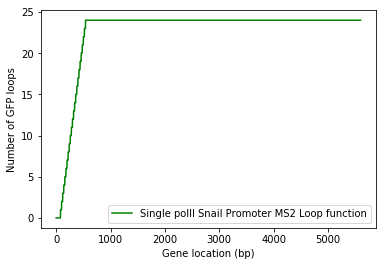

In [4]:
# let's take a quick look at what the loop function for the Snail MS2 system
plt.plot(loop_function, color='g', label='Single polII Snail Promoter MS2 Loop function')
plt.xlabel('Gene location (bp)')
plt.ylabel('Number of GFP loops')
plt.legend()
plt.show()

Since this array is ~5000 elements long, we're going to interpolate it by polII position. Knowing the size of our polII's footprint, sizePol, we can divide the gene up into (gene length) / sizePol sections, indexing them by $i$. We do this by calling the function Interploops

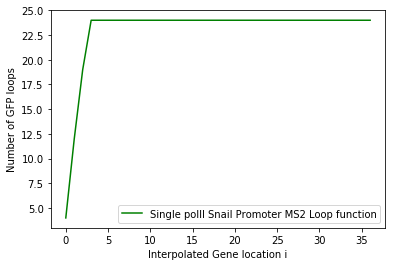

In [5]:
# Snail MS2 system loop function--INTERPOLATED
loopsinterp = loopInterpolate(loop_function, k_elong, tPol)

plt.plot(loopsinterp, color='g', label='Single polII Snail Promoter MS2 Loop function')
plt.xlabel('Interpolated Gene location i')
plt.ylabel('Number of GFP loops')
plt.legend()
plt.show()

Now that we have a working loop function, we can start the analysis. Using the Table function from astropy, we can read in our data **provided it's in the following format:**

![fichier-ex.PNG](attachment:fichier-ex.PNG)

That is, each trace as a column in .csv format, with a unique string marking the column head. The names of each cell doesn't matter, the strings just help astropy.table read our data.

In [6]:
# Now let's read in the Snail Promoter data
table = Table.read('snail-data/snail-control-trace-1.csv')
table

Spot_10,Spot_12,Spot_13,Spot_14,Spot_15,Spot_17,Spot_18,Spot_19,Spot_20,Spot_22,Spot_23,Spot_24,Spot_25,Spot_26,Spot_27,Spot_29,Spot_31,Spot_32,Spot_33,Spot_35,Spot_36,Spot_37,Spot_38,Spot_39,Spot_40,Spot_42,Spot_43,Spot_44,Spot_46,Spot_47,Spot_48,Spot_49,Spot_51,Spot_52,Spot_54,Spot_55,Spot_56,Spot_57,Spot_58,Spot_59,Spot_60,Spot_61,Spot_62,Spot_65,Spot_66,Spot_67,Spot_69,Spot_70,Spot_71,Spot_72,Spot_74,Spot_75,Spot_77,Spot_78,Spot_79,Spot_80,Spot_81,Spot_82,Spot_83,Spot_85,Spot_86,Spot_87,Spot_88,Spot_90,Spot_92,Spot_93,Spot_94,Spot_95,Spot_96,Spot_97,Spot_100,Spot_101,Spot_103,Spot_104,Spot_105,Spot_107,Spot_108,Spot_109,Spot_110,Spot_138,Spot_147,Spot_168
int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11349,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10234,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Now let's build a Python list of all of the cell traces from the read-in table.
datatracelist = []
for name in table.colnames:
    datatracelist.append((np.asarray(table[name])).astype(float))

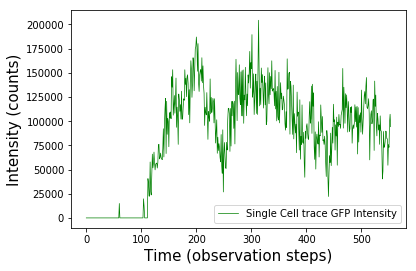

In [8]:
# Let's take a look at what these traces look like:
plt.plot(datatracelist[20], 'g', linewidth=0.7, label = 'Single Cell trace GFP Intensity')
plt.xlabel('Time (observation steps)', fontsize=15)
plt.ylabel('Intensity (counts)', fontsize=15)
plt.legend(loc='best')
plt.show()

To start the analysis, we need to choose a window of time when the majority of our traces are "ON" and in a "steady state". To do this, we plot the mean of all the traces and find where our mean signal plateaus:

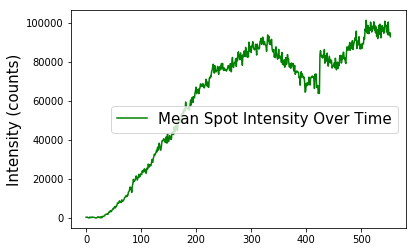

In [9]:
plt.plot(np.mean((datatracelist), axis=0), color='g', label='Mean Spot Intensity Over Time')
plt.legend(loc='best', fontsize=15)
plt.ylabel('Intensity (counts)', fontsize=15)
plt.show()

It appears that by the index ~220 we've reached a more or less steady state. Let's set our start and stop indeces:

In [10]:
# define start and stop indeces
start_index = 250 
stop_index = -1    # end of trace

Now we'll pull in our data processing package, "tracePackageAutocorrelation"

In [11]:
# call the object
autopackage = tracePackageAutocorrelation(datatracelist, loop_function, start_index, stop_index)

Our "autopackage" has a bunch of useful aspects:
- autopackage.
    - autoav:               Our average autocorrelation function
    - auto_err:             The weighted standard error of the autocorrelation function
    - avgflors:             An array of each trace's average fluorescence
    - calibrated_tracelist: Trace data, normalized by $I_o$
    - corrected_tracelist:  Mean-subtraced trace data
    - autolist:             List of individual cells' autocorr functions

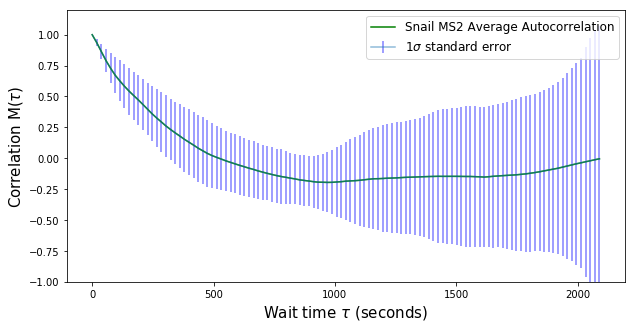

In [12]:
# Let's plot the average function to take a look at it:
fig,ax = plt.subplots(1, 1, figsize=(10,5), sharex=True)

t = np.arange(len(autopackage.tracelist[1][1:])) * stepsize   # we want our axis in units of seconds

tplot = t[::5]                                                # take every 5th element for simplicity
autoav = autopackage.autoav[::5]
autostd = autopackage.auto_err[::5]
avgflors = autopackage.avgflors[::5]

ax.plot(tplot, autoav, color = 'g', label = "Snail MS2 Average Autocorrelation")
ax.errorbar(x=tplot, y=autoav, yerr=(autostd, autostd), ecolor='b', alpha=0.5, label = r'1$\sigma$ standard error')  
ax.legend(loc='best', fontsize='large')
ax.set_xlabel(r'Wait time $\tau$ (seconds)', fontsize=15)
ax.set_ylabel(r'Correlation M($\tau$)', fontsize=15)
ax.set_ylim(-1, 1.2)
plt.show()

### Data Fitting
Now it's time to bring in the fitting class for the autocorrelation function. This class incorporates both the analytic model, as well as a scipy.optimize nonlinear least-squares fitting routine.

In [13]:
# First, create the fitting class object, feeding in the autopackage object.
fitAutoPack = fitAutocorrelationFunction(autopackage, tPol, k_elong, stepsize)

Now we'll run the fitting using the module. We first use the average fluorescence and loop function to compute $P_{on}$. Then, we feed this value into the analytic model and fit for $\tau_{char}$.

Finally, we decouple $k_{on}$ and $k_{off}$ and print / plot the values. 

The function "fitAutoPack.leastSquaresAutoFit" takes in a couple of parameters:
- printvals: (*default = True*) This tells the fn whether or not to display all values at the end
- upper/lower bounds for (kon+koff): EXTREMELY IMPORTANT. This creates a fitting zone that keeps the curve fitting from skewing towards infinity. To guesstimate a healthy bound, take a look at the inflection in the $M(\tau)$ above. The $\tau_{char}=(k_{kon} + k_{off})$ should likely not be more than 1, and certainly not less than 0
- fitpon: (*default = True*) This tells the function whether to hold pon constant or not (for testing inference later)
- pon= ...  (default: don't include) Only for testing inference.




Let's see what we get:

Pon                       =  0.3424434120987148
k_on + k_off              =  0.004404480614373271 s^-1
k_on                      =  0.0015082853701086265
k_off                     =  0.002896195244264644
t_polII_block             =  6 seconds
characteristic timescale  =  227.04152601709058 seconds
covariance                =  1.0314787767650652e-08


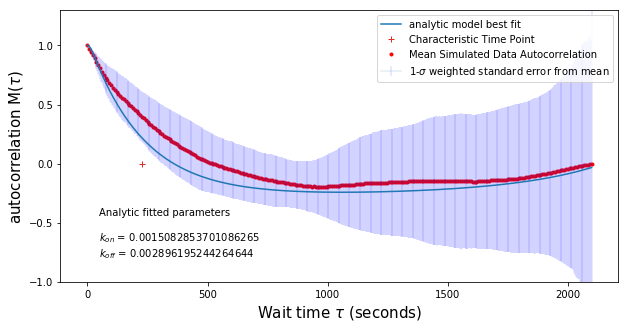

In [14]:
kon_fit,koff_fit,chrtime,pon,popt,pcov = fitAutoPack.leastSquaresAutoFit(printvals=True, upperbound=0.1,lowerbound=0.001, fitpon=True)

Cool! Now we have an estimate for our characteristic time, as well as our promoter dynamics. Assuming that our cells follow a two-state promoter firing system, we infer that our system spends $1/k_{on}=$ 672 seconds in the "OFF" state, and $1/k_{off}=$ 345 seconds in the "ON" state. ($k_{off}$ governs how long until we *switch* back "ON", $k_{on}$ how long we switch back "OFF")

From here we start to see what we mean by "bursty" transcription patterns. We see that in steady-state, our system tends to wait longer in the "OFF" position than it does in the "ON" position. These "ON" times are the bursts everyone is talking about.

## Testing Inferred Parameters: Numerical Simulations

In order to check our hypothesis that our cells fire according to these "ON" and "OFF" wait time distributions, we need to create a bunch of cell samples *in silico* by numerically generating traces according to our hypothetical system. 

What we're going to do is:
- insert our inferred parameters, $k_{on}$ and $k_{off}$ into a random number generator to create a promoter "ON/OFF" signal
- using the same loop function, k_elong, tPol, stepsize parameters, "grow" a simulated GFP signal when the promoter is "ON"
- process these simulated traces as if they were real data
- re-fit the analytic function to see if we get the same $k_{on}$ and $k_{off}$ as for our raw data.


In [54]:
# For SIMULATING data (checking hypotheses, results)
from telegraph import exponential     # exponentially-distributed promoter signal
from pol_signal import pol_signal     # simulated GFP signal
from traceTwoStateSimulation import tracePackageSimulation  # simulated embryo region

In [143]:
# define all needed parameters for simulation
stepsize = 3.8               # time between observations, seconds
tPol=6;                      # polII loading time
k_elong=25;                  # Elongation rate
sizePol = tPol * k_elong     # Footprint, in basepairs, of polII

# Inferred Parameters from the above analysis we wish to test HERE:
k_on = kon_fit
k_off = koff_fit
duration = 2000      # each cell trace's duration, in seconds
num = 100           # number of cells in our simulated dataset

loop_function = SnailPromoterMs2Loops().loop_function    # our MS2 loop function (again)

In [144]:
# simulated trace package object, using the above inputs.
tracePackage = tracePackageSimulation(num, k_on, k_off, duration, stepsize, loop_function, k_elong, tPol)

tracePackageSimulation is a class object with a bunch of aspects as well. Let's look at our local object's aspects:
- tracePackage.
    - tel_list:  Python list of simulated promoter states
    - tracelist: Python list of simulated traces
    - max_list: list of maximum intensities (for later Pon fitting)


In [145]:
simtracelist = tracePackage.tracelist                # trace indexed by observation time (MOST IMPORTANT)
# optional aspects for visualization:
simtracelist_seconds = tracePackage.trace_by_second  # indexed by second, for comparison (below)
tel_list = tracePackage.tel_list                     # simulated promoter state for example

In [146]:
# choose an "ON" cell as an example:
on_sig = []
for i in range(len(tel_list)):
    if sum(tel_list[i]) > 0:
        on_sig.append(i)
randcell = np.random.choice(on_sig)

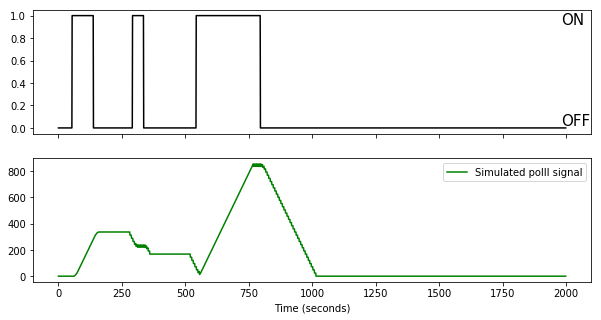

In [156]:
# Here's an example of a simulated telegraph signal with its corresponding polII signal:
# Let's plot the average function to take a look at it:
t = np.arange(len(tracePackage.tel_list[25])) #* stepsize

fig,ax = plt.subplots(2, 1, figsize=(10,5), sharex=True)
ax[0].plot(t, tel_list[randcell], color='k', label='Simulated Telegraph Promoter Signal')
ax[1].plot(t,tracePackage.trace_by_second[randcell], color='g', label='Simulated polII signal')

ax[1].set_xlabel("Time (seconds)")

ax[0].text(x=np.max(t)-20, y=0.92, s='ON', fontsize=15)
ax[0].text(x=np.max(t)-20, y=0.02, s='OFF', fontsize=15)

plt.legend(loc='best')
plt.show()

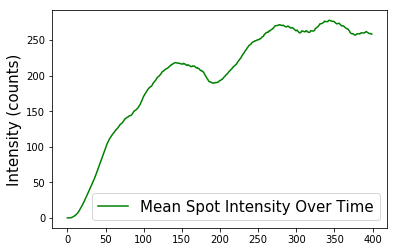

In [148]:
t = np.arange(len(tracePackage.tracelist[0])) * stepsize
plt.plot(np.mean(tracePackage.tracelist, axis=0), color='g', label='Mean Simulated Trace Intensity Over Time')
plt.legend(loc='best', fontsize=15)
plt.ylabel('Intensity (counts)', fontsize=15)
plt.show()

In [149]:
# define start and stop index
start_index = 250
stop_index = -1

In [150]:
# now let's clean the data using the autocorrelation package
simautopackage = tracePackageAutocorrelation(tracePackage.tracelist, loop_function, start_index, stop_index)

In [151]:
# build the fitting object
simfitAutoPack = fitAutocorrelationFunction(simautopackage, tPol, k_elong, stepsize)

Pon                       =  0.372401108038417
k_on + k_off              =  0.008887160944849584 s^-1
k_on                      =  0.0033095885831777297
k_off                     =  0.005577572361671854
t_polII_block             =  6 seconds
characteristic timescale  =  112.52187354382667 seconds
covariance                =  4.464951695649741e-08


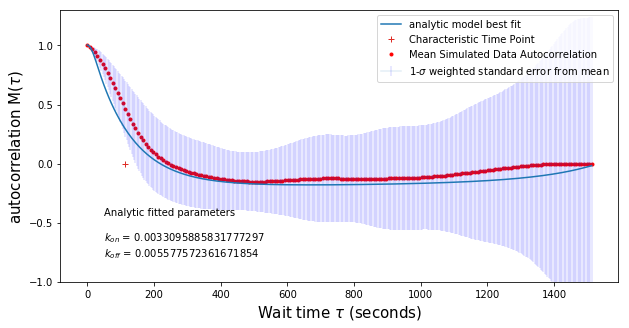

In [152]:
kon_sim_fit,koff_sim_fit,chrtime,pon,popt,pcov = simfitAutoPack.leastSquaresAutoFit(printvals=True, 
                                                                                   upperbound=0.1, lowerbound=0.0001,fitpon=True)

Recall that our inputs were $k_{on}=$ 0.001347 and $k_{off}=$ 0.00299. In other words, our simulated system behaves pretty similarly to our real one.